In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy import stats


# To print multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Display data to three deciaml places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# To print all columns
pd.set_option('max_columns', None)

## 1. 데이터 수집 및 분석
 * 데이터 출처 : [KBO프로야구 공식사이트](https://www.koreabaseball.com/Record/Player/HitterBasic/BasicOld.aspx?sort=HRA_RT), [kbreport](http://www.kbreport.com/leader/main)

In [988]:
# 2021년 KBO 타자 데이터 수집
kbo2021_df = pd.read_csv("../data/kbo2021.csv", encoding="CP949")

# 2020년 KBO 타자 데이터 수집
kbo2020_df = pd.read_csv("../data/kbo2020.csv", encoding="CP949")

# 데이터 일부 출력
kbo2021_df.head(3)
kbo2020_df.head(3)

,#,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,Woba,WAR
0,1,홍창기,LG,144,651,524,172,4,103,52,109,95,23,0.393,0.328,0.456,0.408,0.864,0.412,7.100
1,2,이정후,Hero,123,544,464,167,7,78,84,62,37,10,0.373,0.360,0.438,0.522,0.960,0.429,7.060
2,3,강백호,KT,142,628,516,179,16,76,102,104,85,10,0.385,0.347,0.451,0.521,0.972,0.434,6.970


,#,선수명,팀명,경기,타석,타수,안타,홈런,득점,타점,볼넷,삼진,도루,BABIP,타율,출루율,장타율,OPS,Woba,WAR
0,1,로하스,KT,142,628,550,192,47,116,135,65,132,0,0.383,0.349,0.417,0.680,1.097,0.457,8.760
1,2,양의지,NC,130,528,461,151,33,86,124,46,47,5,0.305,0.328,0.400,0.603,1.003,0.423,6.920
2,3,김하성,Hero,138,622,533,163,30,111,109,75,68,23,0.304,0.306,0.397,0.523,0.920,0.401,6.810


In [989]:
# WAR 2020과 WAR 2021을 비교하기 위해, kbo2020_df에 WAR 2021 column을 추가
kbo2021_df = kbo2021_df[['선수명', 'WAR']]
baseball_df = pd.merge(kbo2020_df, kbo2021_df, on='선수명', how='left')

# column명 변경
baseball_df.rename(columns = {'WAR_x' : 'WAR(2020)', 'WAR_y' : 'WAR(2021)'}, inplace=True)

In [990]:
# 쓸모없는 column 제거
baseball_df = baseball_df.drop(['#'], axis=1)
baseball_df = baseball_df.drop(['BABIP'], axis=1)

baseball_df_columns = [['선수명', '팀명', '경기', '타석', '타수', '안타', '홈런', '득점', '타점', 
                        '볼넷','삼진', '도루', '타율', '출루율', '장타율', 'OPS',
                       'Woba', 'WAR(2020)',  'WAR(2021)']]

# left join 과정에서 WAR(2021)에 NaN값 가진 선수 제거
baseball_df = baseball_df.dropna()
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 1 to 310
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   선수명        246 non-null    object 
 1   팀명         246 non-null    object 
 2   경기         246 non-null    int64  
 3   타석         246 non-null    int64  
 4   타수         246 non-null    int64  
 5   안타         246 non-null    int64  
 6   홈런         246 non-null    int64  
 7   득점         246 non-null    int64  
 8   타점         246 non-null    int64  
 9   볼넷         246 non-null    int64  
 10  삼진         246 non-null    int64  
 11  도루         246 non-null    int64  
 12  타율         246 non-null    float64
 13  출루율        246 non-null    float64
 14  장타율        246 non-null    float64
 15  OPS        246 non-null    float64
 16  Woba       246 non-null    float64
 17  WAR(2020)  246 non-null    float64
 18  WAR(2021)  246 non-null    float64
dtypes: float64(7), int64(10), object(2)
memory usage: 

### WAR(2021) 분포 확인

Text(0.5, 1.0, 'WAR(2020), WAR(2021) histogram')

<AxesSubplot:title={'center':'WAR(2020), WAR(2021) histogram'}, xlabel='WAR(2020)', ylabel='Density'>

<AxesSubplot:title={'center':'WAR(2020), WAR(2021) histogram'}, xlabel='WAR(2021)', ylabel='Density'>

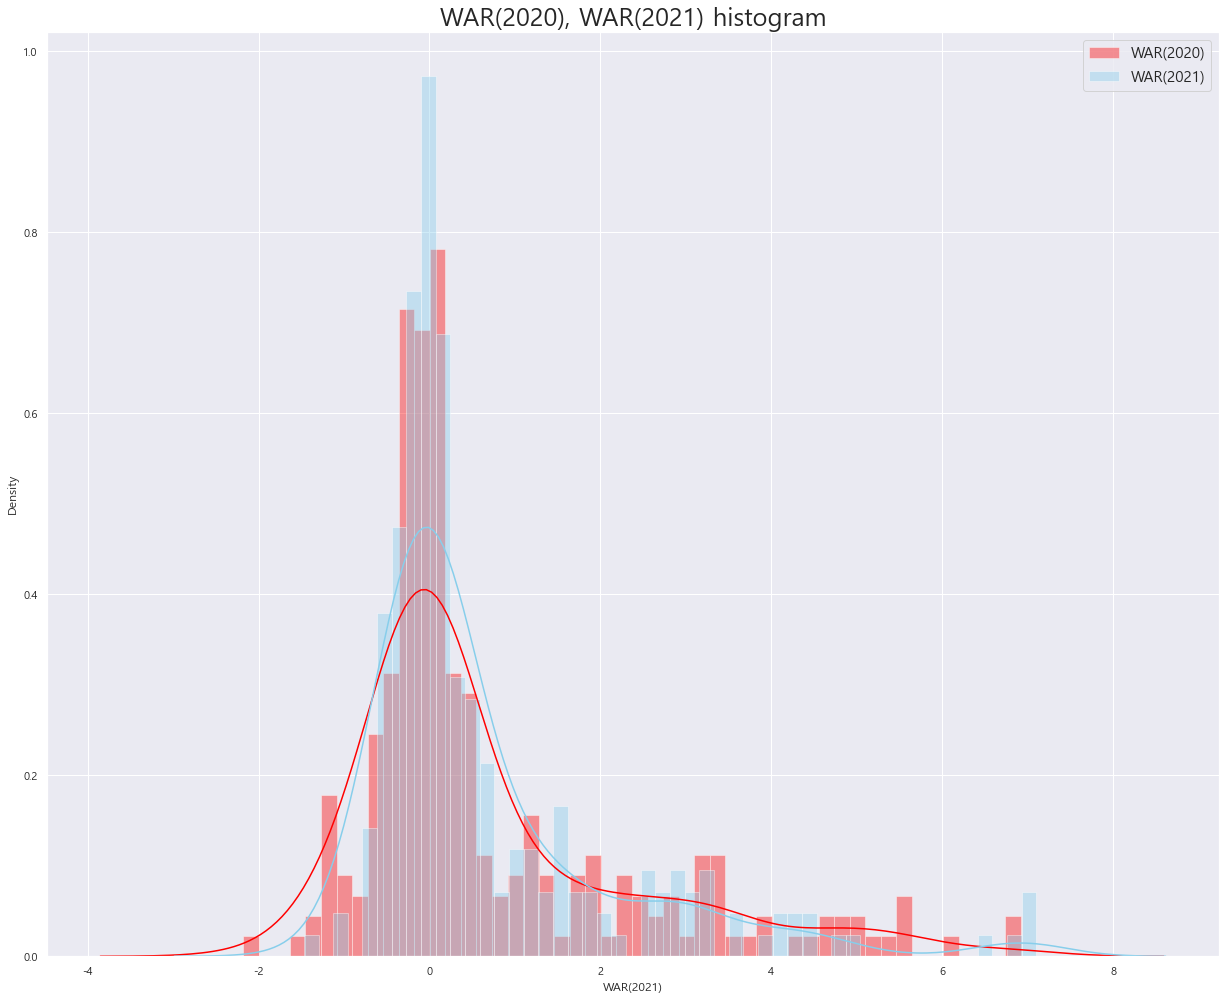

In [991]:
plt.title('WAR(2020), WAR(2021) histogram', fontsize = 25)
sns.distplot(baseball_df['WAR(2020)'], bins = 50, color='red', label = 'WAR(2020)')
sns.distplot(baseball_df['WAR(2021)'], bins = 50, color='skyblue', label = 'WAR(2021)')
plt.legend(fontsize = 15)

# baseball_df['WAR(2021)'].hist(bins=100, xlabelsize = 20, ylabelsize = 20)

### 회귀 분석에 사용할 컬럼 확인

In [992]:
baseball_df_columns = baseball_df[[ '경기', '타석', '타수', '안타', '홈런', '득점', '타점', 
                        '볼넷','삼진', '도루', '타율', '출루율', '장타율', 'OPS',
                       'Woba', 'WAR(2020)',  'WAR(2021)']]

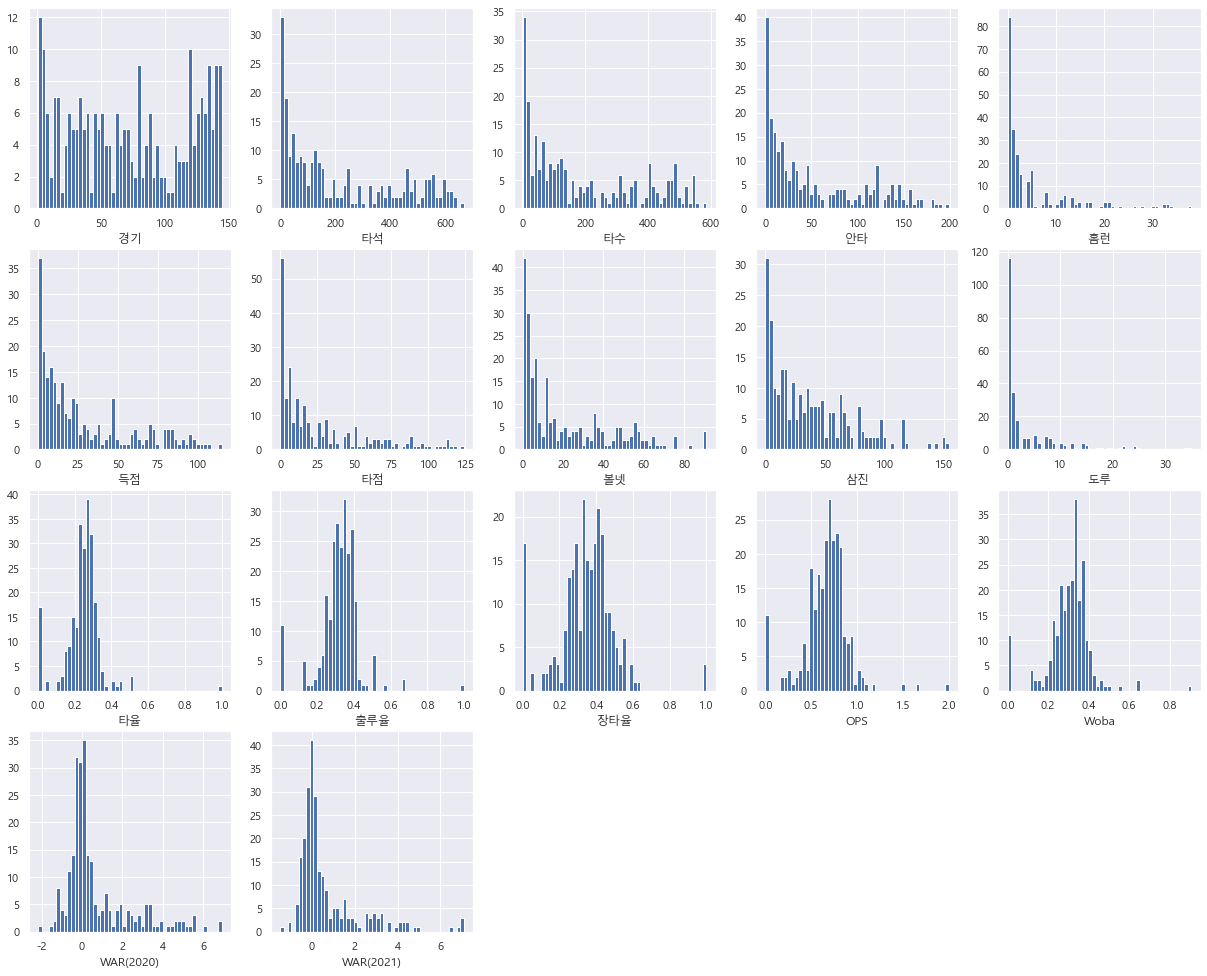

In [993]:
def plot_hist_column(df):
    plt.rcParams['figure.figsize'] = [21, 17]
    fig = plt.figure(1)
    
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i], y = -0.2) # title 위치를 하단으로 설정하기 위해 y값 추가
    plt.show()
    
plot_hist_column(baseball_df_columns)  

## 각 컬럼별로 WAR 수치에 미치는 영향도 조사

<AxesSubplot:xlabel='경기', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타석', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타수', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='안타', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='홈런', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='득점', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타점', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='볼넷', ylabel='WAR(2021)'>

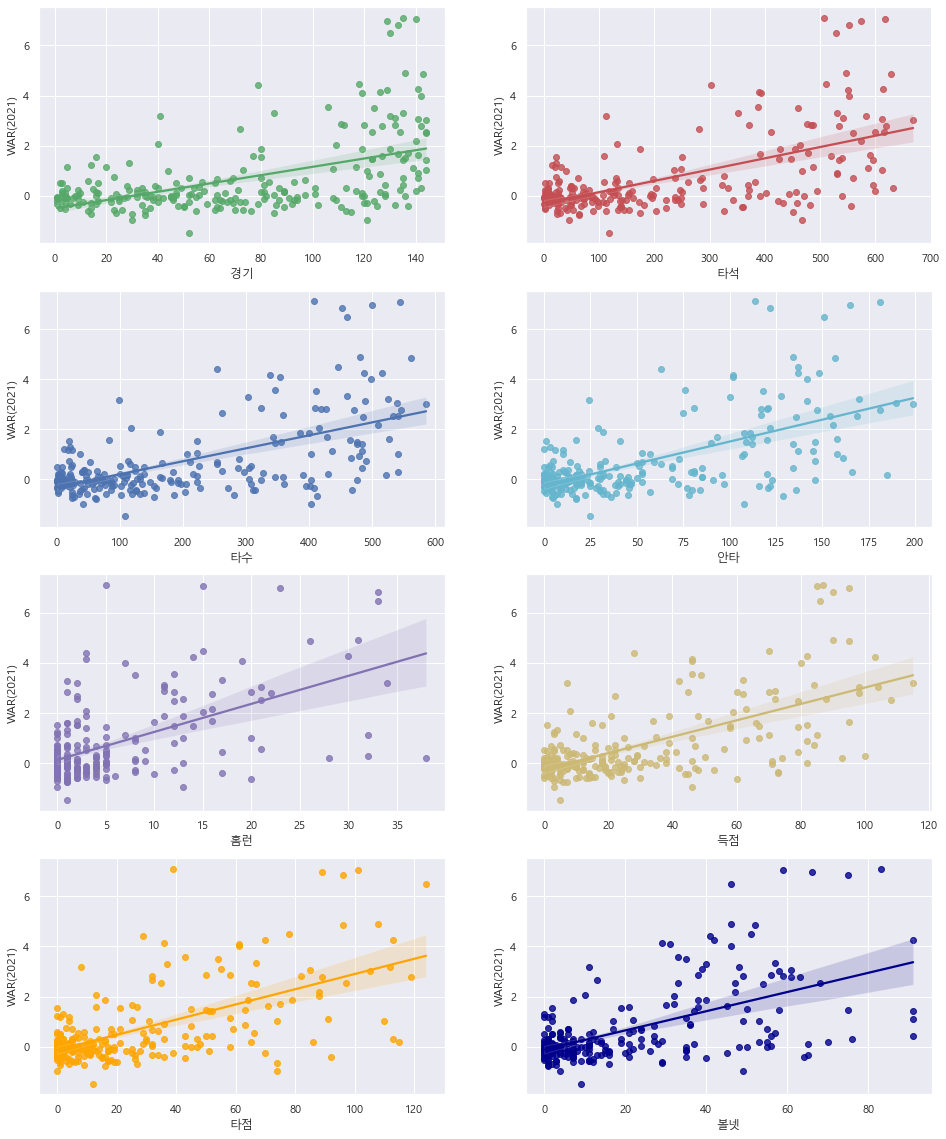

In [994]:
# seaborn에서 한글 깨짐 수정
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

fig, axs = plt.subplots(figsize = (16, 20), ncols = 2, nrows = 4)
lm_features = ['경기', '타석', '타수', '안타', '홈런', '득점', '타점', '볼넷'] # 8개
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue']
for i , feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='WAR(2021)',data=baseball_df , ax=axs[row][col], color=colors[i])

<AxesSubplot:xlabel='삼진', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='도루', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='타율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='출루율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='장타율', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='OPS', ylabel='WAR(2021)'>

<AxesSubplot:xlabel='Woba', ylabel='WAR(2021)'>

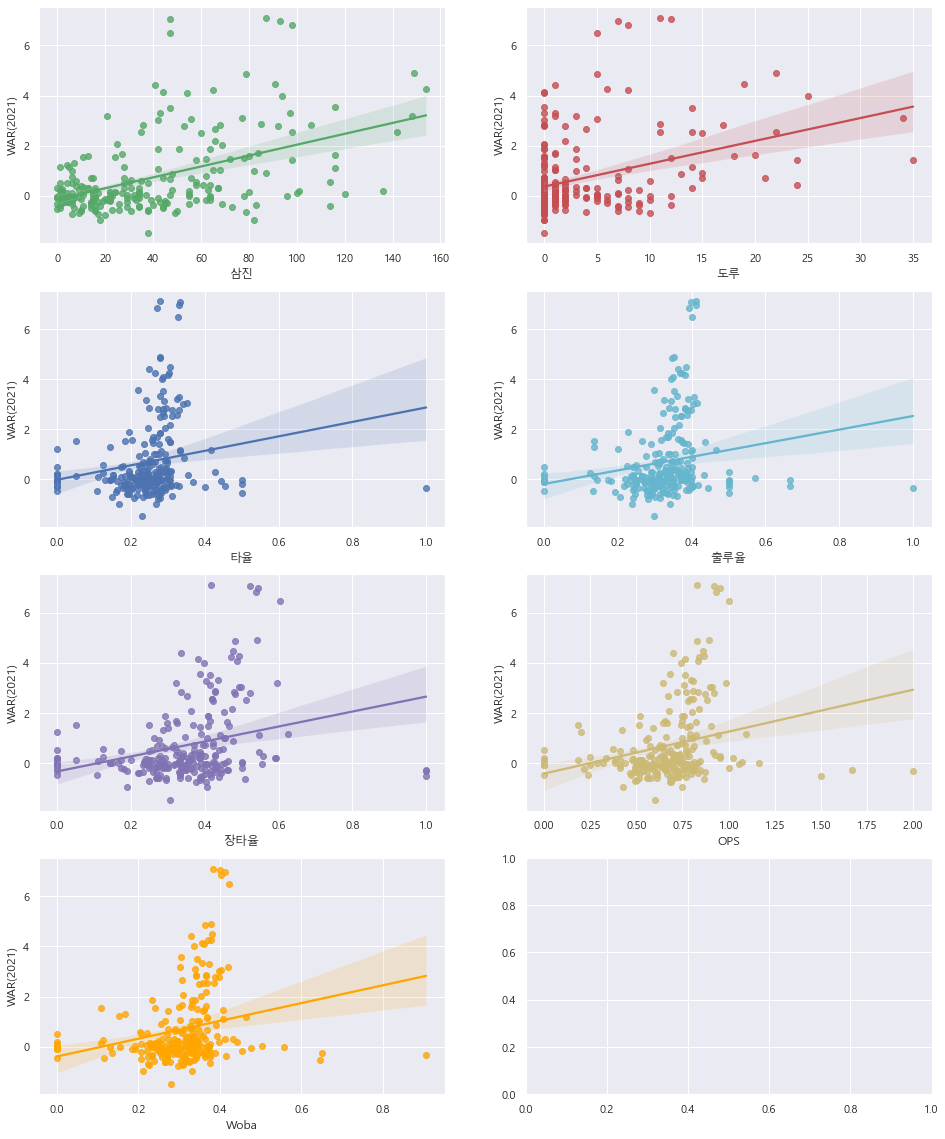

In [995]:
fig, axs = plt.subplots(figsize = (16, 20), ncols = 2, nrows = 4)
lm_features = ['삼진', '도루', '타율', '출루율', '장타율', 'OPS', 'Woba'] # 7개
colors = ['g', 'r', 'b', 'c', 'm', 'y', 'orange', 'darkblue']
for i , feature in enumerate(lm_features):
    row = int(i / 2)
    col = i % 2
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='WAR(2021)',data=baseball_df , ax=axs[row][col], color=colors[i])

## 2. Feature Scaling 
* 서로 다른 변수(컬럼)의 값 범위를 일정한 수준으로 맞춰 준다. 

### 원-핫 인코딩으로 object 타입 '팀명' 처리

In [996]:
teamName_encoding = pd.get_dummies(baseball_df['팀명'])
baseball_df = baseball_df.drop(['팀명'], axis = 1)
baseball_df = baseball_df.join(teamName_encoding)

# 결과본 일부 출력
teamName_encoding.head(3)

,Hero,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
1,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [997]:
# 컬럼명 변경
baseball_df = baseball_df.rename(columns = {'WAR(2021)' : 'y'})

## 3. 회귀 분석(Linear Regression)

In [998]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.preprocessing import StandardScaler
import math

In [999]:
# x : '선수명', '팀명', 'y'만 제외
x1 = baseball_df[baseball_df.columns.difference(['선수명', 
        'Hero', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화', 'y'])]
y1 = baseball_df['y'] # WAR(2021)

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1,test_size=0.2, random_state=3)

lr = LinearRegression()
lr_model = lr.fit(x1_train, y1_train)
pred = lr_model.predict(x1_test)

LR_rmse = np.sqrt(mean_squared_error(y1_test, pred))
print(f'Linear Regression RMSE : {LR_rmse}')

Linear Regression RMSE : 0.9727152925684172


### 3-1.예측 모델 평가하기

### statsmodel을 이용한 회귀 분석
* statsmodel 패키지에서 OLS 클래스를 사용하여 선형 회귀분석(Linear Regression)을 실시한다.
* R-squared(결정계수), Adj.R-sqaured(조정된 결정계수) : 회귀 분석이 얼마나 잘 이루어졌는지 평가하는 지표.
    숫자가 1에 가까울수록 데이터를 잘 설명하는 모델이다.
* P >|t| : 독립변수들의 유의 확률. 0.05보다 작아야 유의미한 수치.
* 참고 사이트 : [공식 문서](https://pypi.org/project/statsmodels/), [티스토리 블로그](https://ysyblog.tistory.com/119) 

In [1000]:
import statsmodels.api as sm

# FutureWarning 제거 위해
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1001]:
# statsmodel 라이브러리로 회귀 분석을 수행한다.
x1_train = sm.add_constant(x1_train)
model = sm.OLS(y1_train, x1_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     14.84
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.68e-24
Time:                        22:52:57   Log-Likelihood:                -286.80
No. Observations:                 196   AIC:                             605.6
Df Residuals:                     180   BIC:                             658.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1316      0.277      0.475      0.635      -0.415       0.678
OPS            0.9758      3.847      0.254      0.800      -6.616       8.567
WAR(2020)      1.2322      0.208      5.926      0.000       0.822       1.642
Woba          -3.8646     11.696     -0.330      0.741     -26.943      19.214
경기            -0.0055      0.005     -1.180      0.240      -0.015       0.004
도루             0.0239      0.020      1.177      0.241      -0.016       0.064
득점             0.0250      0.013      1.861      0.064      -0.002       0.052
볼넷             0.0119      0.023      0.518      0.605      -0.034       0.057
삼진            -0.0122      0.006     -1.904      0.058      -0.025       0.000
안타            -0.1173      0.024     -4.923      0.000      -0.164      -0.070
장타율           -1.1704      1.234     -0.949      0.344      -3.605       1.264
출루율            2.1462      4.518      0.475      0.635      -6.770      11.062
타석            -0.0632      0.023     -2.707      0.007      -0.109      -0.017
타수             0.1041      0.028      3.763      0.000       0.050       0.159
타율             0.2304      2.377      0.097      0.923      -4.460       4.921
타점            -0.0034      0.014     -0.237      0.813      -0.032       0.025
홈런            -0.0383      0.042     -0.922      0.358      -0.120       0.044
==============================================================================
Omnibus:                       28.301   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.803
Skew:                           0.468   Prob(JB):                     7.83e-23
Kurtosis:                       6.404   Cond. No.                     2.99e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

결정 계수와 조정된 계수 수치가 상당히 낮은 수치를 나타낸다. 

### 다중 공선성 문제 확인
* 출처 : [Wikipedia](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)

In [1002]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1003]:
X = baseball_df[baseball_df.columns.difference(['선수명', 
        'Hero', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화', 'y'])]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,3.285,도루
1,15.423,삼진
2,19.282,WAR(2020)
3,23.927,홈런
4,26.668,경기
5,51.247,득점
6,61.732,타점
7,69.717,타율
8,85.696,볼넷
9,476.440,안타


공산성 수치가 약 15 이상이면 독립 변수들 간에 상관 관계가 있다고 판단되는데, 현재 도루를 제외한 모든
지표가 공산성 수치 15를 초과한다. 즉, 현재 데이터는 좋지 못한 데이터로 볼 수 있다.

### 3-2. 예측값(예측WAR(2021))과 기존값(WAR(2021)) 비교

In [1004]:
# 2021년 WAR를 예측하여 dataframe의 컬럼으로 생성
predict_WAR2021 = lr.predict(X)
baseball_df['예측WAR(2021)'] = pd.Series(predict_WAR2021)

In [1005]:
# 기존의 dataframe 다시 로드

# 컬럼명 재변경
baseball_df = baseball_df.rename(columns = {'y' : 'WAR(2021)'})

b1 = baseball_df.copy()
b1 = b1[['선수명', 'WAR(2020)', 'WAR(2021)']]

b2 = baseball_df[['선수명','예측WAR(2021)']]

# dataframe 최종 결과 합치기
result_df = b1.copy()
result_df = pd.merge(result_df, b2, on='선수명', how='left')
result_df = result_df.dropna() # left join 이후 NaN 값 제거
result_df.info()
result_df.head(10)

result_df = result_df[result_df['WAR(2020)'] > 0]
result_df = result_df[result_df['WAR(2021)'] > 0]
result_df = result_df[result_df['예측WAR(2021)'] > 0]
result_df = result_df.dropna() 
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 267
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   선수명          262 non-null    object 
 1   WAR(2020)    262 non-null    float64
 2   WAR(2021)    262 non-null    float64
 3   예측WAR(2021)  262 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.2+ KB


,선수명,WAR(2020),WAR(2021),예측WAR(2021)
0,양의지,6.920,6.480,2.448
1,최형우,6.740,0.190,3.793
2,터커,6.100,0.300,4.216
3,나성범,5.640,3.190,3.868
4,최정,5.570,6.830,2.985
5,이정후,5.540,7.060,2.864
6,손아섭,5.440,3.050,4.971
7,강백호,5.170,6.970,2.809
8,황재균,5.020,2.530,2.908
9,로맥,4.940,1.120,1.944


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 171
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   선수명          98 non-null     object 
 1   WAR(2020)    98 non-null     float64
 2   WAR(2021)    98 non-null     float64
 3   예측WAR(2021)  98 non-null     float64
dtypes: float64(3), object(1)
memory usage: 3.8+ KB


<AxesSubplot:xlabel='선수명'>

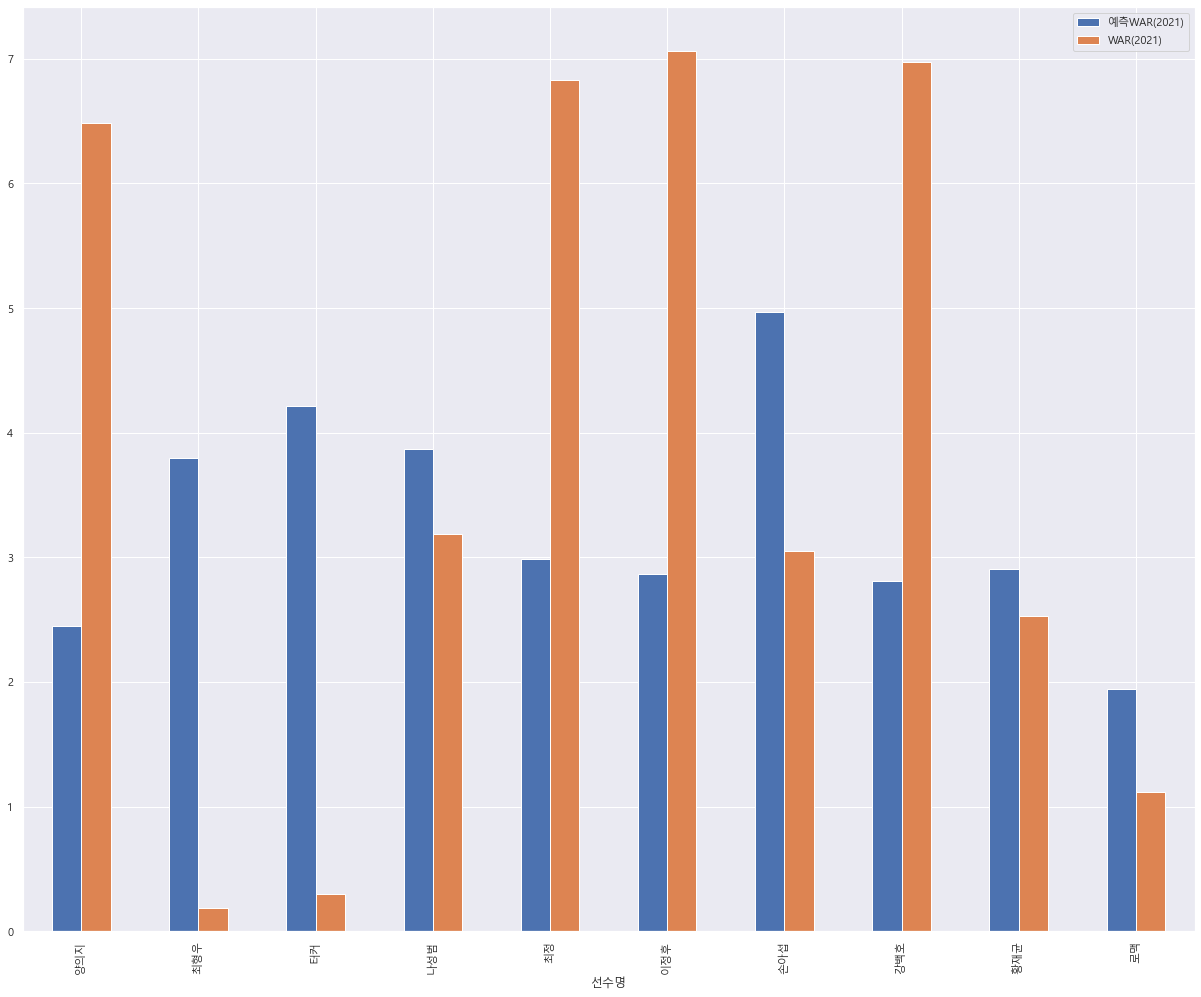

In [1006]:
# 상위 10명의 데이터만 추려서 그래프로 관찰.
result_df = result_df.head(10)
result_df.plot(x='선수명', y=['예측WAR(2021)','WAR(2021)'],
               kind="bar")

그래프로부터 일치율이 매우 낮은 걸 확인할 수 있다.

## 4. 회귀 분석 및 데이터 표준화(Standardization)

In [1007]:
# 앞서 정의됨
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.preprocessing import StandardScaler
# import math

from numpy import * # mean, std 함수 사용을 위해

In [1008]:
# 컬럼명 변경
baseball_df = baseball_df.rename(columns = {'WAR(2021)' : 'y'})
# 앞서 임의로 추가했던 컬럼 제거
baseball_df = baseball_df.drop(['예측WAR(2021)'], axis=1)


# x : '선수명', '팀명', 'y'만 제외
x2 = baseball_df[baseball_df.columns.difference(['선수명', 
        'Hero', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화', 'y'])]
y2 = baseball_df['y'] # WAR(2021)

# y2만 따로 표준화
y2 = (y2 - mean(y2, axis=0)) / std(y2, axis=0)

print('feature 들의 평균 값')
print(x2.mean())
print('\nfeature 들의 분산 값')
print(x2.var())

# 표준화(Standardization) 수행
st_scalar = StandardScaler()
st_scalar.fit(x2)
standard_scaled = st_scalar.transform(x2)

# 표준화 확인
# 최종적으로 표준화 dataframe 
baseball_df_scaled = pd.DataFrame(data = standard_scaled, 
    columns=['OPS', 'WAR(2020)', 'Woba', '경기', '도루', '득점', '볼넷', '삼진', '안타', 
            '장타율', '출루율', '타석', '타수', '타율', '타점', '홈런'])
print("\n=========== 표준화 ==============\n")
print('feature 들의 평균 값')
print(baseball_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(baseball_df_scaled.var())


# x : 입력 변수, y : 목표 변수
x2_train, x2_test, y2_train, y2_test = train_test_split(baseball_df_scaled, y2, test_size = 0.2, random_state = 1)

standard_lr = LinearRegression()
lr_model2 = standard_lr.fit(x2_train, y2_train)
pred2 = lr_model2.predict(x2_test)


standard_LR_rmse = np.sqrt(mean_squared_error(y2_test, pred2))

print(f'Standard Linear Regression RMSE : {standard_LR_rmse}')

feature 들의 평균 값
OPS           0.659
WAR(2020)     0.718
Woba          0.303
경기           71.500
도루            3.467
득점           28.793
볼넷           20.898
삼진           37.618
안타           52.732
장타율           0.341
출루율           0.319
타석          219.764
타수          192.358
타율            0.241
타점           26.980
홈런            5.008
dtype: float64

feature 들의 분산 값
OPS             0.062
WAR(2020)       2.809
Woba            0.011
경기           2162.145
도루             35.776
득점            880.141
볼넷            515.994
삼진           1168.425
안타           2892.213
장타율             0.024
출루율             0.012
타석          41616.573
타수          31523.545
타율              0.011
타점            963.742
홈런             59.575
dtype: float64


StandardScaler()


=========== 표준화 ==============

feature 들의 평균 값
OPS          0.000
WAR(2020)    0.000
Woba        -0.000
경기           0.000
도루          -0.000
득점          -0.000
볼넷          -0.000
삼진           0.000
안타           0.000
장타율          0.000
출루율          0.000
타석          -0.000
타수           0.000
타율           0.000
타점           0.000
홈런          -0.000
dtype: float64

feature 들의 분산 값
OPS         1.004
WAR(2020)   1.004
Woba        1.004
경기          1.004
도루          1.004
득점          1.004
볼넷          1.004
삼진          1.004
안타          1.004
장타율         1.004
출루율         1.004
타석          1.004
타수          1.004
타율          1.004
타점          1.004
홈런          1.004
dtype: float64
Standard Linear Regression RMSE : 0.7015727287800527


### 4-1. 예측 모델 평가하기

In [1009]:
# 앞서 정의됨
# import statsmodels.api as sm

# # FutureWarning 제거 위해
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [1010]:
x2_train = sm.add_constant(x2_train)

x2_train = np.array(x2_train)
y2_train = np.array(y2_train)

standard_model = sm.OLS(y2_train, x2_train).fit()
standard_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     13.39
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.96e-22
Time:                        22:52:57   Log-Likelihood:                -202.70
No. Observations:                 196   AIC:                             437.4
Df Residuals:                     180   BIC:                             489.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0085      0.051      0.166      0.868      -0.093       0.110
x1             0.1223      0.359      0.341      0.734      -0.586       0.831
x2             1.3259      0.213      6.232      0.000       0.906       1.746
x3            -0.4017      1.028     -0.391      0.696      -2.430       1.626
x4            -0.1294      0.158     -0.820      0.413      -0.441       0.182
x5             0.0343      0.076      0.455      0.650      -0.115       0.183
x6             0.2733      0.271      1.007      0.315      -0.262       0.809
x7             0.6546      0.340      1.928      0.055      -0.015       1.325
x8            -0.2093      0.138     -1.519      0.131      -0.481       0.063
x9            -3.7588      0.815     -4.613      0.000      -5.367      -2.151
x10           -0.0083      0.186     -0.045      0.965      -0.375       0.359
x11            0.2883      0.608      0.474      0.636      -0.912       1.489
x12          -11.1817      3.068     -3.645      0.000     -17.235      -5.129
x13           14.3029      3.156      4.532      0.000       8.075      20.531
x14           -0.0358      0.167     -0.214      0.831      -0.366       0.294
x15           -0.1212      0.317     -0.382      0.703      -0.747       0.505
x16           -0.3114      0.223     -1.398      0.164      -0.751       0.128
==============================================================================
Omnibus:                       33.206   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.549
Skew:                           0.694   Prob(JB):                     2.18e-20
Kurtosis:                       6.027   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.68e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

결정계수와 조정결정계수를 통해, 앞선 분석 모델보다는 성능이 조금 떨어지는 걸 확인할 수 있다.

### 다중 공선성 문제 확인

In [1011]:
# 앞서 정의됨.
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1012]:
X2 = baseball_df_scaled[baseball_df_scaled.columns.difference(['선수명', 
        'Hero', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화', 'y'])]


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns 
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,2.459,도루
1,6.963,삼진
2,8.633,경기
3,10.723,타율
4,16.331,WAR(2020)
5,16.818,홈런
6,26.338,득점
7,35.110,타점
8,46.335,볼넷
9,242.820,안타


공산성 수치가 15 이하인 지표가 '도루', '삼진', '경기', '타율' 총 4개로, 
앞선 회귀 분석보다는 데이터가 더 양호하나, 여전히 좋은 데이터로 보기는 힘들다. 

### 4-2. 예측값(예측WAR(2021))과 기존값(WAR(2021)) 비교

In [1013]:
# 2021년 WAR를 예측하여 dataframe의 컬럼으로 생성
predict2_WAR2021 = standard_lr.predict(X2)
baseball_df['예측WAR(2021)'] = pd.Series(predict2_WAR2021)

In [1014]:
# 기존의 dataframe 다시 로드

# 컬럼명 재변경
baseball_df = baseball_df.rename(columns = {'y' : 'WAR(2021)'})

c1 = baseball_df.copy()
c1 = c1[['선수명', 'WAR(2020)', 'WAR(2021)']]

c2 = baseball_df[['선수명','예측WAR(2021)']]

# dataframe 최종 결과 합치기
std_result_df = c1.copy()
std_result_df = pd.merge(std_result_df, c2, on='선수명', how='left')
std_result_df = std_result_df.dropna() # left join 이후 NaN 값 제거
std_result_df.info()
std_result_df.head(10)

std_result_df = std_result_df[std_result_df['WAR(2020)'] > 0]
std_result_df = std_result_df[std_result_df['WAR(2021)'] > 0]
std_result_df = std_result_df[std_result_df['예측WAR(2021)'] > 0]
std_result_df = std_result_df.dropna() 
std_result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 267
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   선수명          262 non-null    object 
 1   WAR(2020)    262 non-null    float64
 2   WAR(2021)    262 non-null    float64
 3   예측WAR(2021)  262 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.2+ KB


,선수명,WAR(2020),WAR(2021),예측WAR(2021)
0,양의지,6.920,6.480,1.283
1,최형우,6.740,0.190,1.683
2,터커,6.100,0.300,1.794
3,나성범,5.640,3.190,2.065
4,최정,5.570,6.830,1.694
5,이정후,5.540,7.060,1.444
6,손아섭,5.440,3.050,2.496
7,강백호,5.170,6.970,1.427
8,황재균,5.020,2.530,1.444
9,로맥,4.940,1.120,1.006


<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 139
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   선수명          64 non-null     object 
 1   WAR(2020)    64 non-null     float64
 2   WAR(2021)    64 non-null     float64
 3   예측WAR(2021)  64 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.5+ KB


<AxesSubplot:xlabel='선수명'>

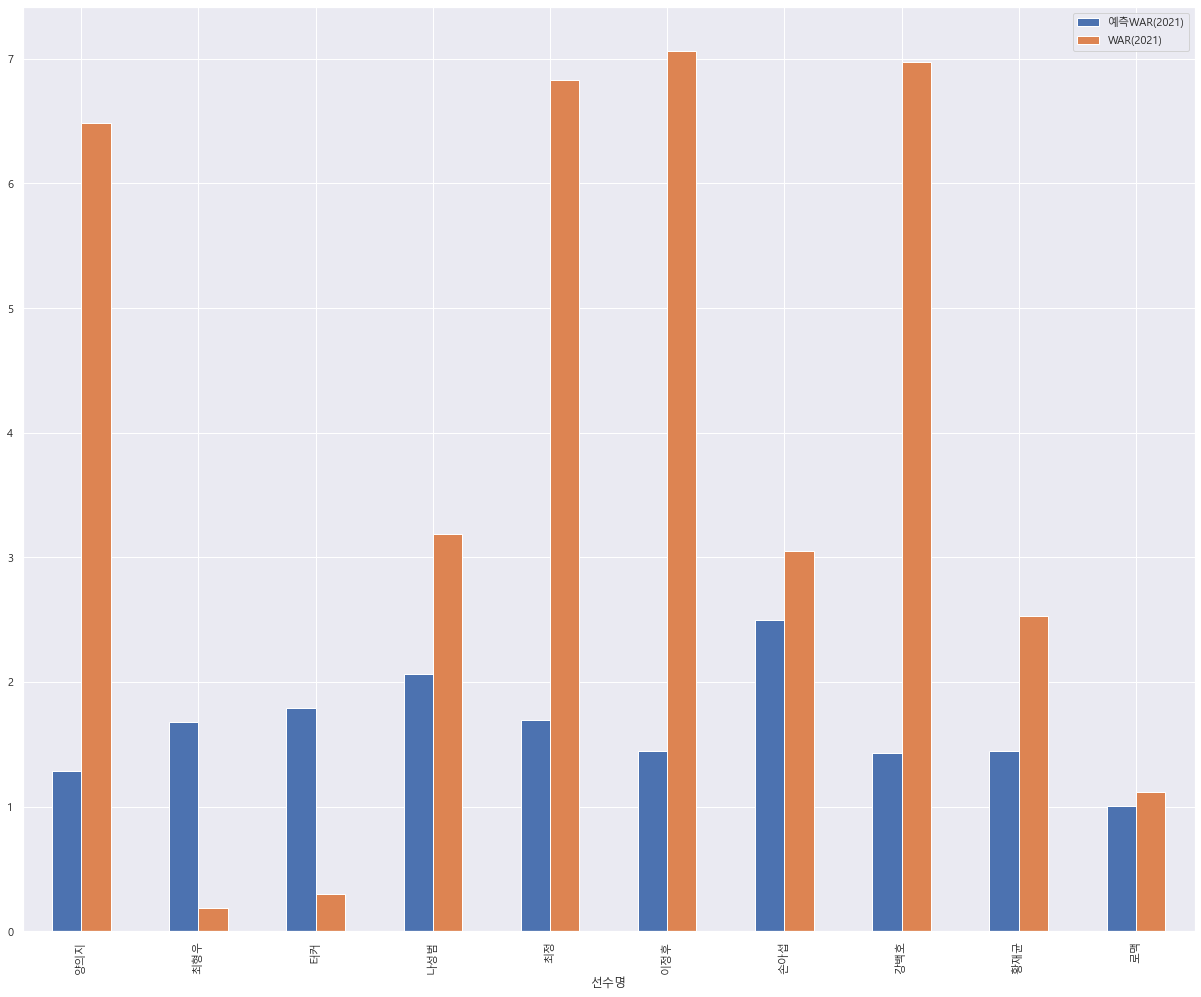

In [1015]:
# 상위 10명의 데이터만 추려서 그래프로 관찰.
std_result_df = std_result_df.head(10)
std_result_df.plot(x='선수명', y=['예측WAR(2021)','WAR(2021)'],
               kind="bar")

In [1016]:
print(f'Linear Regression RMSE : {LR_rmse}')
print(f'Standardization Linear Regression RMSE : {standard_LR_rmse}')

Linear Regression RMSE : 0.9727152925684172
Standardization Linear Regression RMSE : 0.7015727287800527


## 5. 회귀 분석 및 데이터 정규화(Normalization)

In [1017]:
from sklearn.preprocessing import MinMaxScaler

In [1018]:
# 컬럼명 변경
baseball_df = baseball_df.rename(columns = {'WAR(2021)' : 'y'})
# 앞서 임의로 추가했던 컬럼 제거
baseball_df = baseball_df.drop(['예측WAR(2021)'], axis=1)


# x : '선수명', '팀명', 'y'만 제외
x3 = baseball_df[baseball_df.columns.difference(['선수명', 
        'Hero', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화', 'y'])]
y3 = baseball_df['y'] # WAR(2021)

# y3만 따로 정규화
y3 = ( y3 - y3.min()) / (y3.max() - y3.min())


print('feature 들의 평균 값')
print(x3.mean())
print('\nfeature 들의 분산 값')
print(x3.var())

# 정규화(Normalization)) 수행
nl_scalar = MinMaxScaler()
nl_scalar.fit(x3)
normal_scaled = nl_scalar.transform(x3)

# 정규화 확인
# 최종적으로 정규화 dataframe 
baseball_df_normal = pd.DataFrame(data = normal_scaled, 
    columns=['OPS', 'WAR(2020)', 'Woba', '경기', '도루', '득점', '볼넷', '삼진', '안타', 
            '장타율', '출루율', '타석', '타수', '타율', '타점', '홈런'])
print("\n=========== 표준화 ==============\n")
print('feature 들의 평균 값')
print(baseball_df_normal.mean())
print('\nfeature 들의 분산 값')
print(baseball_df_normal.var())


# x : 입력 변수, y : 목표 변수
x3_train, x3_test, y3_train, y3_test = train_test_split(baseball_df_normal, y3, test_size = 0.2, random_state = 1)

normal_lr = LinearRegression()
lr_model3 = normal_lr.fit(x3_train, y3_train)
pred3 = lr_model3.predict(x3_test)


normal_LR_rmse = np.sqrt(mean_squared_error(y3_test, pred3))

print(f'Normal Linear Regression RMSE : {normal_LR_rmse}')


feature 들의 평균 값
OPS           0.659
WAR(2020)     0.718
Woba          0.303
경기           71.500
도루            3.467
득점           28.793
볼넷           20.898
삼진           37.618
안타           52.732
장타율           0.341
출루율           0.319
타석          219.764
타수          192.358
타율            0.241
타점           26.980
홈런            5.008
dtype: float64

feature 들의 분산 값
OPS             0.062
WAR(2020)       2.809
Woba            0.011
경기           2162.145
도루             35.776
득점            880.141
볼넷            515.994
삼진           1168.425
안타           2892.213
장타율             0.024
출루율             0.012
타석          41616.573
타수          31523.545
타율              0.011
타점            963.742
홈런             59.575
dtype: float64


MinMaxScaler()


=========== 표준화 ==============

feature 들의 평균 값
OPS         0.330
WAR(2020)   0.318
Woba        0.334
경기          0.493
도루          0.099
득점          0.250
볼넷          0.230
삼진          0.244
안타          0.265
장타율         0.341
출루율         0.319
타석          0.328
타수          0.327
타율          0.241
타점          0.218
홈런          0.132
dtype: float64

feature 들의 분산 값
OPS         0.016
WAR(2020)   0.034
Woba        0.014
경기          0.106
도루          0.029
득점          0.067
볼넷          0.062
삼진          0.049
안타          0.073
장타율         0.024
출루율         0.012
타석          0.094
타수          0.092
타율          0.011
타점          0.063
홈런          0.041
dtype: float64
Normal Linear Regression RMSE : 0.12402545194798141


### 5-1. 예측 모델 평가하기

In [1019]:
x3_train = sm.add_constant(x3_train)

x3_train = np.array(x3_train)
y3_train = np.array(y3_train)

normal_model = sm.OLS(y3_train, x3_train).fit()
normal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     13.39
Date:                Tue, 21 Dec 2021   Prob (F-statistic):           2.96e-22
Time:                        22:52:58   Log-Likelihood:                 136.93
No. Observations:                 196   AIC:                            -241.9
Df Residuals:                     180   BIC:                            -189.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1182      0.056     -2.121      0.035      -0.228      -0.008
x1             0.2094      0.549      0.381      0.703      -0.874       1.293
x2             1.2753      0.205      6.232      0.000       0.872       1.679
x3            -0.6085      1.557     -0.391      0.696      -3.681       2.464
x4            -0.0705      0.086     -0.820      0.413      -0.240       0.099
x5             0.0356      0.078      0.455      0.650      -0.119       0.190
x6             0.1877      0.186      1.007      0.315      -0.180       0.555
x7             0.4645      0.241      1.928      0.055      -0.011       0.940
x8            -0.1670      0.110     -1.519      0.131      -0.384       0.050
x9            -2.4638      0.534     -4.613      0.000      -3.518      -1.410
x10           -0.0272      0.209     -0.130      0.897      -0.440       0.386
x11            0.4460      0.956      0.467      0.641      -1.441       2.333
x12           -6.4763      1.777     -3.645      0.000      -9.982      -2.970
x13            8.3480      1.842      4.532      0.000       4.713      11.983
x14           -0.0615      0.287     -0.214      0.831      -0.629       0.506
x15           -0.0858      0.224     -0.382      0.703      -0.529       0.357
x16           -0.2716      0.194     -1.398      0.164      -0.655       0.112
==============================================================================
Omnibus:                       33.206   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.549
Skew:                           0.694   Prob(JB):                     2.18e-20
Kurtosis:                       6.027   Cond. No.                     3.12e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.23e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 다중 공선성 문제 확인

In [1020]:
X3 = baseball_df_normal[baseball_df_normal.columns.difference(['선수명', 
        'Hero', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화', 'y'])]


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns 
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

C:\Users\samsung\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,3.276,도루
1,15.425,삼진
2,21.479,홈런
3,22.234,WAR(2020)
4,27.253,경기
5,50.863,득점
6,61.722,타점
7,69.685,타율
8,85.085,볼넷
9,284.788,안타


3번의 회귀 분석과 마찬가지로, '도루' 지표를 제외한 나머지는 모두 공산성 수치가 
15 이상으로 좋지 않은 데이터이다. 

### 5-2. 예측값(예측WAR(2021))과 기존값(WAR(2021)) 비교

In [1021]:
# 2021년 WAR를 예측하여 dataframe의 컬럼으로 생성
predict3_WAR2021 = normal_lr.predict(X3)
baseball_df['예측WAR(2021)'] = pd.Series(predict3_WAR2021)

baseball_df.shape

(246, 29)

In [1022]:
# 기존의 dataframe 다시 로드

# 컬럼명 재변경
baseball_df = baseball_df.rename(columns = {'y' : 'WAR(2021)'})

d1 = baseball_df.copy()
d1 = d1[['선수명', 'WAR(2020)', 'WAR(2021)']]

d2 = baseball_df[['선수명','예측WAR(2021)']]

# dataframe 최종 결과 합치기
nom_result_df = d1.copy()
nom_result_df = pd.merge(nom_result_df, d2, on='선수명', how='left')
nom_result_df = nom_result_df.dropna() # left join 이후 NaN 값 제거
nom_result_df.info()
nom_result_df.head(10)

nom_result_df = nom_result_df[nom_result_df['WAR(2020)'] > 0]
nom_result_df = nom_result_df[nom_result_df['WAR(2021)'] > 0]
nom_result_df = nom_result_df[nom_result_df['예측WAR(2021)'] > 0]
nom_result_df = nom_result_df.dropna() 
nom_result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 267
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   선수명          262 non-null    object 
 1   WAR(2020)    262 non-null    float64
 2   WAR(2021)    262 non-null    float64
 3   예측WAR(2021)  262 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.2+ KB


,선수명,WAR(2020),WAR(2021),예측WAR(2021)
0,양의지,6.920,6.480,0.478
1,최형우,6.740,0.190,0.549
2,터커,6.100,0.300,0.569
3,나성범,5.640,3.190,0.616
4,최정,5.570,6.830,0.551
5,이정후,5.540,7.060,0.507
6,손아섭,5.440,3.050,0.693
7,강백호,5.170,6.970,0.504
8,황재균,5.020,2.530,0.507
9,로맥,4.940,1.120,0.429


<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 171
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   선수명          120 non-null    object 
 1   WAR(2020)    120 non-null    float64
 2   WAR(2021)    120 non-null    float64
 3   예측WAR(2021)  120 non-null    float64
dtypes: float64(3), object(1)
memory usage: 4.7+ KB


<AxesSubplot:xlabel='선수명'>

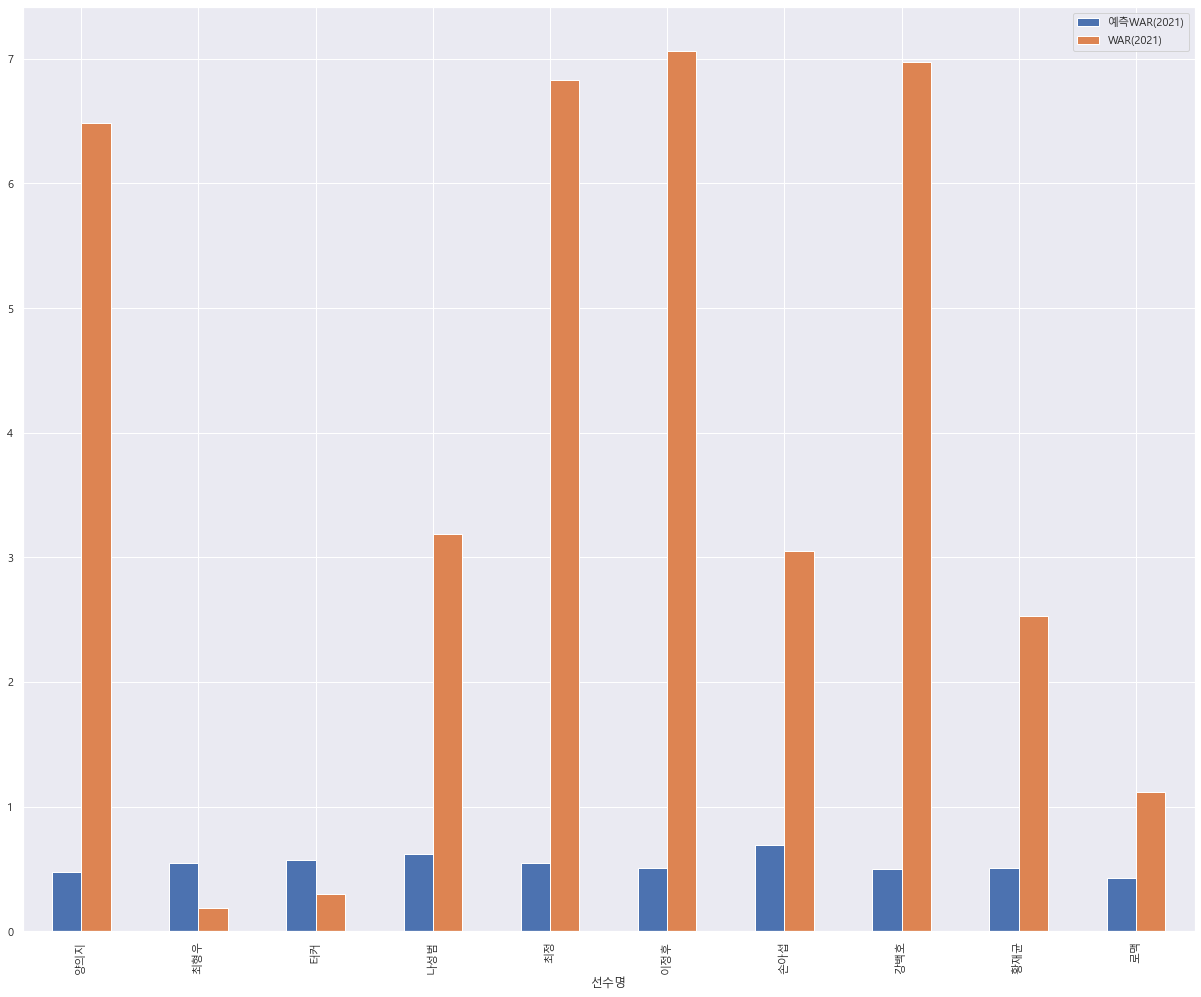

In [1023]:
# 상위 10명의 데이터만 추려서 그래프로 관찰.
nom_result_df = nom_result_df.head(10)
nom_result_df.plot(x='선수명', y=['예측WAR(2021)','WAR(2021)'],
               kind="bar")

In [1024]:
### RSME 지표 비교

In [1025]:
print(f'Linear Regression RMSE : {LR_rmse}')
print(f'Standardization Linear Regression RMSE : {standard_LR_rmse}')
print(f'Normal Linear Regression RMSE : {normal_LR_rmse}')

Linear Regression RMSE : 0.9727152925684172
Standardization Linear Regression RMSE : 0.7015727287800527
Normal Linear Regression RMSE : 0.12402545194798141
